# pyPegase: A short User Guide

In [1]:
%%file document_configuration.tex
\def\documentTitle{pyPegase: A Short User Guide}
\def\documentAuthor{Morgan Fouesneau et al.}

Overwriting document_configuration.tex


In [2]:
# Loading notebook configuration
# Don't forget that mac has this annoying configuration that leads
# to limited number of figures/files
# ulimit -n 4096    <---- osx limits to 256
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format='retina'

import pylab as plt
import numpy as np
from mf_jupyter import figrc, setup_mpl
setup_mpl.solarized_colors()
setup_mpl.theme()

from mf_jupyter import (add_input_toggle, add_citation_button, 
                        LatexFigure, LatexSubfigures, LatexNumberFormatter, 
                        load_latex_macros)

add_input_toggle();     # Hide code button
add_citation_button();  # Add bitex reference
load_latex_macros()     # Load latex macros `notebook_macros` file

(Latex macros)
$
    \newcommand{\dataerr}{\mathbf{\Sigma_D}}
    \newcommand{\PI}{\mathbf{\pi}}
    \newcommand{\nclobs}{n_{c,obs}}
    \newcommand{\nclpred}{n_{c,pred}}
    \newcommand{\birthrate}{\dot n_{birth}}
    \newcommand{\Mi}{M_{i}}
    \newcommand{\ts}{\tilde{t}}
    \newcommand{\tage}{t_{age}}
    \newcommand{\PI}{\overrightarrow{\pi}}
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\dt}{\Delta t}
    \newcommand{\Ge}{\gamma_e}
    \newcommand{\Gd}{\gamma_d} 
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\given}{\,\mid\,}
    \newcommand{\prob}{\mathcal{P}}
    \newcommand{\data}{\mathbf{D}}
    \newcommand{\datai}{\mathbf{D_i}}
    \newcommand{\T}{\mathbf{\theta}}
    \newcommand{\Ti}{\mathbf{\theta_i}}
    \newcommand{\err}{\mathbf{\Sigma_D}}
    \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
    \newcommand{\like}{\mathcal{L}}
    \newcommand{\best}{\mathrm{best}}
    \newcommand{\normal}{\mathcal{N}}
    \newcommand{\Pbad}{\prob_{\mathrm{b}}}
    \newcommand{\union}{\cup}
    \newcommand{\intersect}{\cap}
    \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
    \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
    \newcommand{\card}{\operatorname{card}}	
    \newcommand{\sgn}{\operatorname{sgn}}
    \newcommand{\rank}{\operatorname{rank}}				
    \newcommand{\EE}{\operatornamewithlimits{E}}
    \newcommand{\id}{\operatorname{id}}			
   \newcommand{\abs}[1]{\left| #1 \right|}
   \newcommand{\norm}[1]{\left\| #1 \right\|}
   \newcommand{\pa}[1]{\left(#1\right)}
   \newcommand{\bra}[1]{\left[#1\right]}
   \newcommand{\cbra}[1]{\left\{#1\right\}} 	
   \newcommand{\Vec}[1]{\overrightarrow}
   \newcommand{\mmatrix}[1]{\boldsymbol{#1}}
   \newcommand{\inverse}[1]{{#1}^{-1}}
   \newcommand{\transpose}[1]{{#1}^{\scriptscriptstyle \top}}
   \newcommand{\mean}[1]{\left<{#1}\right>}
   \newcommand{\Proba}[1]{\prob\left(\, #1 \,\right)}
   \newcommand{\proba}[1]{\prob(\, #1 \,)}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
$
$
  \newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}% 
  \newcommand{\arcdeg}{\mbox{$^\circ$}}% 
  \newcommand{\arcmin}{\mbox{$^\prime$}}% 
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}% 
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}% 
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}% 
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}% 
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}% 
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}% 
  \newcommand{\slantfrac}{\case}% 
  \newcommand{\onehalf}{\slantfrac{1}{2}}% 
  \newcommand{\onethird}{\slantfrac{1}{3}}% 
  \newcommand{\twothirds}{\slantfrac{2}{3}}% 
  \newcommand{\onequarter}{\slantfrac{1}{4}}% 
  \newcommand{\threequarters}{\slantfrac{3}{4}}% 
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system 
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B 
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V 
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R 
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R 
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}% 
  \newcommand{\nodata}{ ~$\cdots$~ }% 
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}% 
  \newcommand{\degr}{\arcdeg}% 
  \newcommand{\sun}{\odot}% 
  \newcommand{\Sun}{\sun}% 
  \newcommand{\Sol}{\sun}% 
  \newcommand{\Av}{{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand{\latin}[1]{\textsl{#1}}
  \newcommand{\aposteriori}{\latin{a~posteriori}}
  \newcommand{\apriori}{\latin{a~priori}}
  \newcommand{\adhoc}{\latin{ad~hoc}}
  \newcommand{\etal}{\latin{et~al.}}
  \newcommand{\eg}{{e.g.}}
  \newcommand{\ie}{\latin{i.e.}}
  \newcommand{\term}[1]{{\bf #1}}
  \newcommand{\code}[1]{{\tt #1}}
  \newcommand{\Fref}[1]{Fig.\,\ref{#1}}
  \newcommand{\Sref}[1]{\S\,\ref{#1}}
  \newcommand{\Eref}[1]{Eq.\,\ref{#1}}
$


# Abstract

The understanding of galaxy evolutions is related to the study of cluster samples from large surveys.
These studies have until now relied on continuous population synthesis models, which provide a
very poor approximation of the integrated light of star clusters, in particular clusters of low and
intermediate masses because their light are dominated by only a very few luminous stars.

We present pyPegase a stellar population synthesis suite generating integrated spectra of discrete
populations. This code upgrades the latest version of the spectro-photometric model of galaxy evolution
PEGASE.2 (Fioc & Rocca-Volmerange 1997) with a new initial mass function considerations
which explicitly account for stochastic fluctuations due to finite and small number of stars in 
populations of stellar cluster scales. In spite of uncertainties and limitations in the production of discrete
population synthesis that we discuss, this discrete population model should prove useful to the study
of low and intermediate mass populations.

The code sources, including input data, and stellar library may be obtained at the address given
in the abstract. It may be easily used by anyone, familiar or not with spectral evolution questions.

Further improvements will also be available as PEGASE is still under active development.

In [3]:
# needed later for plots etc
from pypegase.helpers import val_in_unit, hasUnit, unit
from pypegase.tools import latexFloat, timeit

# Introduction

The growing body of high quality photometric surveys of clusters and especially
the increasing techniques and instrument sensitivity offer a very new study
window for low and intermediate mass objects. It makes necessary to push the
confidence levels of our models to produce reliable interpretations of the
colors and luminosities of this kind of objects. To derive intrinsic properties
of unresolved stellar populations, one can either fit an integrated observed
spectrum with a synthetic spectral energy distribution (SED) or adjust synthetic
SEDs with the integrated photometry, or even a combination of both.
Luminosities and colors of stellar populations are related to their ages, masses
and metallicities, in a very complex relation.  Various models
\citep[e.g,][]{Fioc1997, Leitherer1999, Vazdekis1999, Bruzual2003, Cordier2007,
Popescu2010, Conroy2010} allow us to predict the evolution of their SEDs. They
are based on assumptions for the stellar evolution (evolutionary tracks), and
for formation history (e.g., initial mass function, star formation history). 

Simple stellar population (SSP) synthesis is the atomic component of any stellar
population analysis, especially when interpreting integrated SEDs.
Conceptually, all stars of an SSP are co-eval, i.e, at any given time, the stars
composing an SSP describe the same isochrone.  Therefore, we cannot {\apriori}
tell all stellar groups, associations or star clusters are SSPs. Regardless some
clusters have been explicitly shown to host stellar populations of a composite
nature (e.g.,  NGC 2808, \citealt{Piotto2007}; see also \citealt{Kalirai2010};
\citealt{vanLoon2010}, or $\omega$-Centauri, \citealt{Villanova2007}), star
clusters are often quoted as the reference in matter of SSP examples in nature. 

One major issue when studying low and intermediate mass clusters is the
fluctuations of their SEDs due to the random presence of a very few luminous
stars dominating the energy distribution. Pioneering work has shown that the
predicted luminosity and color distributions depend strongly on the total mass
in the cluster, and can be far from Gaussian even for total mass above
$10^5$M$_\odot$ \citep[e.g,][]{Barbaro1977, Girardi1993, Ferraro1995, Lancon2000,
Bruzual2002, Cervino2006}.
Therefore, a reliable interpretation of observed SEDs requires models able to
predict these fluctuations. Because it remains on accounting for the presence of
massive stars in a given population, this translate into considering the initial
mass function (IMF) as a distribution of discrete masses. To address the
question of producing _discrete population synthesis models_, we adapted the
last version of PEGASE.2 \citep{Fioc1999} to explicitly produce integrated SEDs
of discrete populations. 

In this paper, we present a code that aims to produce discrete models and we
focus on predictions of colors and luminosities according to different
assumptions. To avoid confusion, hereafter we adopt the "$m$" notation to
refer to individual star masses, in opposition to "$M$", which will refer to
the mass of a population of stars.

# A common synthesis recipe
As a simplification, the common assumption is to consider a composite of
multiple co-eval populations: single-age single-metallicity, so-called
"simple" or "single" populations. {We note that a distinction between
single and simple seems to appear in the literature. "Simple population" tend
to refer to populations with a uniform age spread in contrast with "single"
that refers to single isochrone. In this paper we only refer to single age
populations.}

In one "Single Stellar Population" (SSP) model, we consider $N$ stars formed
at the same time $t$ in the past, which follow a mass distribution distribution
driven by the choice an IMF, $\phi(m)$, and with identical chemical composition
$Z$. The integrated spectrum of such population is hence given by the summation
of the spectrum $f_\lambda$ of the individual stars:
\begin{eqnarray}
  \label{eq:ssp}
  S_\lambda^N (t, Z) &=& \sum_{i=1}^{N} f_\lambda\, \left( m_i, t, Z \right), \\
  \&\ \frac{dN}{dm} &=& \phi(m)\nonumber,
\end{eqnarray}
where the mass function, $\phi(m)$, represents the probability of a stellar mass
$m$ to contribute to the observed light of the population.

The true difficulty lies into the determination of the individual star
distribution of energy as a function of stellar mass, $m$, age, $t$, and metallicity, $Z$. Strictly,
$f_\lambda$ is a complex function of stellar evolution physics and the mapping
with time and chemical composition is not trivial. This relation first requires
stellar evolutionary tracks or isochrones, which determine where a star of given
stellar parameters ($m,\,t,\,Z$) lies on the Hertzsprung-Russel (HR) diagram or
$\log(g) - T_{eff}$ diagram. Second, it requires a spectral library, either from
computation or empirical construction, with full coverage of $\log(g)$,
$T_{eff}$, and $Z$ to predict the resulting spectrum of such a star.  In
practice, for a given parameter triplet ($m,\,t,\,Z$), $f_\lambda$ is computed
through (at least two) interpolations between isochrones and between reference
stars in the spectral library of choice.

Although \Eref{eq:ssp} summaries how to generate a spectrum of one SSP,
it is also clear that the computation cost of this operation includes a direct
scaling with the number $N$ of stars in the simulated population. 

## Using ingredients available in Pegase

Therefore, one must select a stellar initial mass function (IMF), a set of isochrones, 
a prescription for nebular emission and continuum, and a spectral library.
Below we show how to proceed using internal libraries.

In [4]:
from pypegase import imf
from pypegase import isochrones
from pypegase import nebular
from pypegase import stellibs

oIMF = imf.Kroupa2001()
oISO = isochrones.Pegase()
oNEB = nebular.Pegase()
oSL  = stellibs.Rauch() + stellibs.BaSeL()

Figure: HRD_example_Pegase (Example of isochrone content using the isochrones from Pegase.2 (Fioc+1997) regardless of metallicity content)

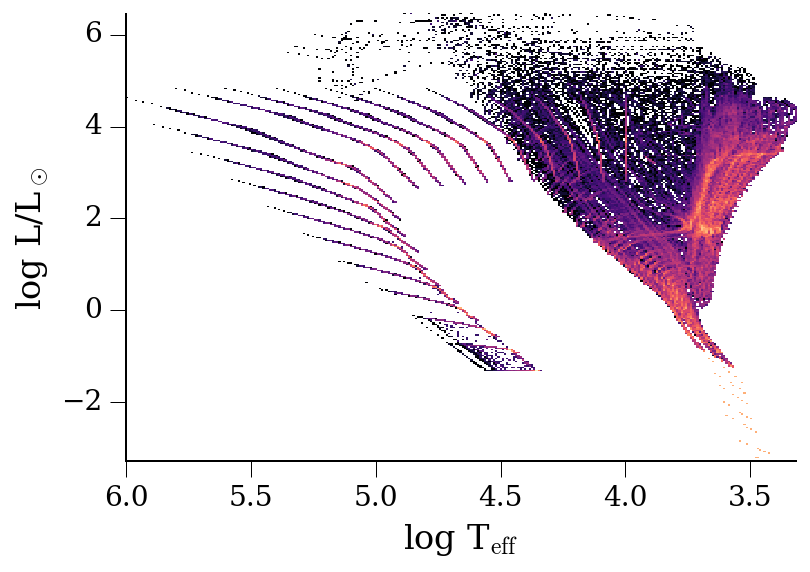

In [5]:
from matplotlib.colors import LogNorm
plt.hist2d(oISO.data['logT'], oISO.data['logL'], bins=300, rasterized=True, cmap=plt.cm.magma, norm=LogNorm())
plt.xlabel(r'log T$_{\rm{eff}}$')
plt.ylabel(r'log L/L$_\odot$')
plt.xlim(plt.xlim()[::-1])
figrc.hide_axis('top right'.split())
LatexFigure("HRD_example_{0:s}".format(oISO.__class__.__name__), 
            "Example of isochrone content using the isochrones from {0:s} regardless of metallicity content".format(oISO.name))

# Making a continuous model

A common simplification in SSP models is to consider a continuum of
stars instead of a discrete and finite number of them. In this context, each
stellar mass bin will contribute to the integrated SED according to the mass
function:
\begin{eqnarray}
  S^\infty_\lambda (t, Z) &=& \int \overline{f_\lambda}\, \left( m, t, Z \right)\, \phi(m) dm, 
  \label{eq:conti_ssp_def}
\end{eqnarray}
In practice, $S^\infty_\lambda (t, Z)$ is often normalized to $1M_\odot$ from the inclusion
of the mass normalized initial mass function $\phi(m)$, offering a direct link
to the total mass of the population through the mass-to-light ratio, $M/L$.

In practice, the computation of \Eref{eq:conti_ssp_def} requires a
discretization of the mass dimension in order to proceed to the numerical
integration.  However, the timescales of the different evolution phases varies
over many orders of magnitudes.  As a result, a simple discretization leads to
oscillations of the emitted light \citep{Charlot1991} unless rapid evolution
phases can be resolved with a sufficient time resolution \citep{Lancon1996}. To
avoid this computational problem, one possibility is to discretize the mass
dimension according to the evolution phases variations. In other words, we
resample the isochrone such that every evolution phase is represented at least
by one mass bin. Hence, we rewrite the previous equation as follow:
\begin{eqnarray}
  \label{eq:conti_ssp}
  S^\infty_\lambda (t, Z) &=& \sum_{i=1}^{N_\infty} \overline{f_\lambda}\, \left( m_j, t, Z \right)\, \int_{m_{j}^{-}}^{m_{j}^{+}} \phi(m) dm,\\
  \&\ N_\infty &=& N_\infty(t,\,Z) \nonumber
\end{eqnarray}
where [${m_{j}^{-}}$, ${m_{j}^{+}}$] is the mass range representative of the
$j$-th evolution phase, and the number
$N_\infty$ of masses implicitly becomes a function of time and metallicity:
$N_\infty(t,\,Z)$.  The latter number corresponds also to the effective number
of stars, as each of these masses becomes a fiducial-star representative of the mass
bin in which it lies. In this approach, the mass distribution $\phi$ is often
normalized to $1M_\odot$, such that the total mass of the population $M$, becomes
an independent scaling factor of the modeled spectrum.

It could be surprising at first glance, that Eq.\ref{eq:conti_ssp} provides a
significant reduction of computing cost compared to \Eref{eq:ssp}. However, by
assuming a continuum of stars, the number of synthetic stars is directly given
by $N(t,\,Z)$ is fixed whatever the total mass of the simulated cluster. Hence,
it becomes very handy for clusters of a few $10^4$ stars. In practice, $N$ can
be generally kept under a few $1000$ masses to conservatively sample any
isochrone.

## Generating a continuous population

Now one need to define the age of the population, it's metallicity and the fraction of UV photons that will be processed by the interstellar medium (ISM) in a form of nebular continuum and emission.

Below we also show how to include units. The code internally works with fixed units and will warn the user when guessing input values.

In [6]:
age = 1e8 * unit['yr']
Z = 0.02
fracNeb = 1.

Finally one runs the simulation. Below we use the shortcut provided in the code, but one can decompose the process.

Note: `timeit` is only used to report how long the computations took.

In [7]:
from pypegase import ssp

with timeit('continuous SSP generation'):
    l, s, p = ssp.continuous(age, Z, oIMF, oISO, oSL, oNEB, fracNeb=fracNeb)

Timing continuous SSP generation
continuous SSP generation Execution time: 1.3 s


## Make some plots

Figure: Population ( Final population characteristics.  **left**: HD diagram of the population.  Each gray dot shows the location of a model in the spectral library. The green line shows the isochrone of the population.  Colored dots emphasize the stars selected to construct the population red means  more weight than blue during the interpolation.  **Right** the final spectrum (green) is constructed by adding the contribution  of each star in the population (blue) with the nebular component.  **Population characteristics**     Age: 100 Myr,     Z: 0.0200, ;     **Ingredients**     IMF: Kroupa 2001,     Isochrone: Pegase.2 (Fioc+1997),     Nebular: Pegase model (Fioc+1997),     Stellib: Rauch + BaSeL 2.2 )

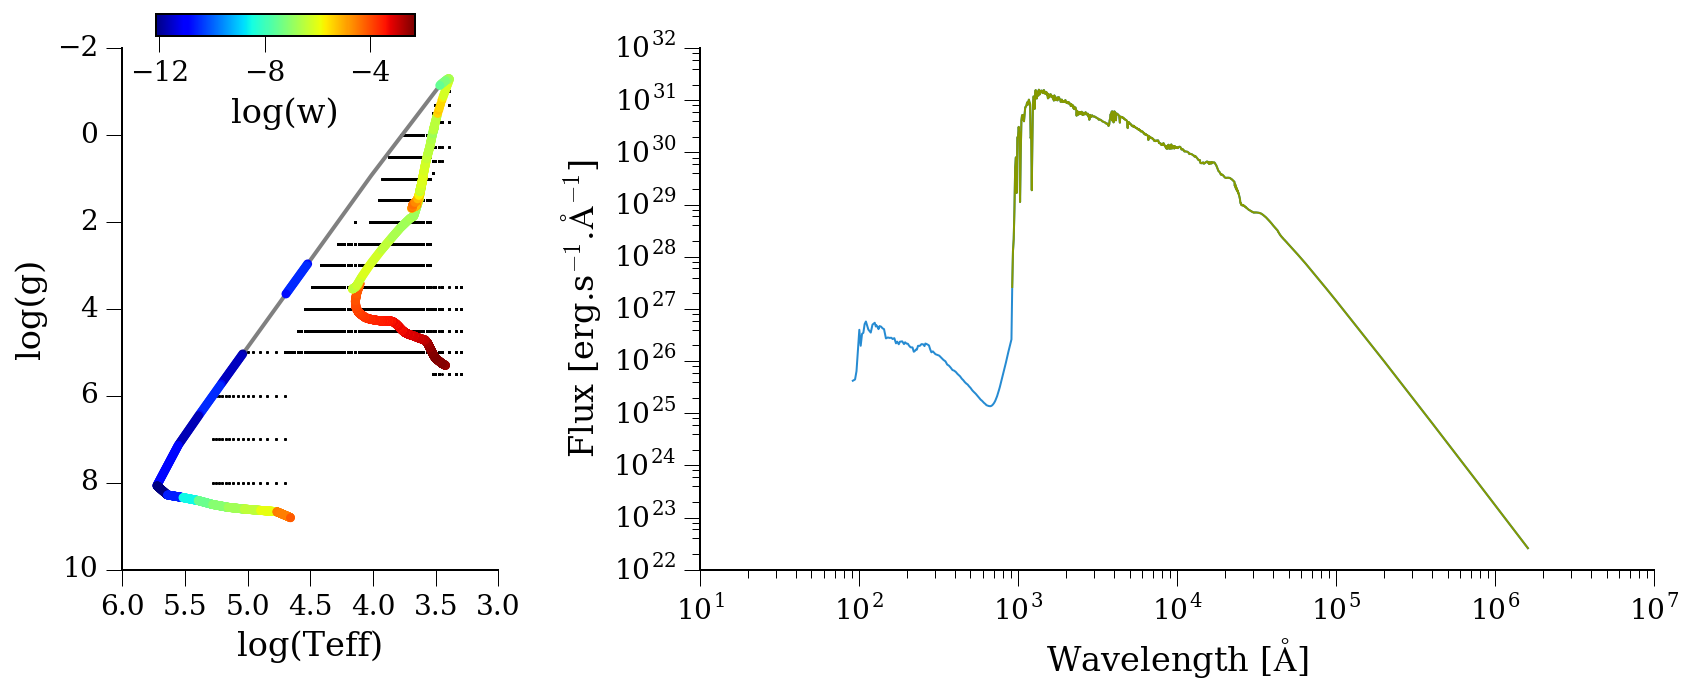

In [8]:
from matplotlib import ticker

# Handle default units for the plots
# We plot the wavelength in AA and the spectra in erg/s/AA/msun
l = val_in_unit('wavelength', l, 'AA').magnitude
l0 = val_in_unit('l0', p['l0'], 'AA').magnitude
s = val_in_unit('spectrum', s, 'erg/s/AA/msun').magnitude
s0 = val_in_unit('s0', p['s0'], 'erg/s/AA/msun').magnitude
mtot = val_in_unit('Mtot', p['Mtot'], 'msun').magnitude
stars = p['stars']  # individual stars
dN = p['dN']        # individual weights

plt.figure(figsize=(12, 5))

# HRdiagram: plot stellib log(g), log(Teff), selected isochrone, ...etc.
# ----------------------------------------------------------------------
ax1 = plt.subplot2grid((1, 3), (0, 0), 1, 1)
# plot the grid
ax1.plot(oSL.logT, oSL.logg, '.', color='0.0', ms=2, rasterized=True, zorder=-10)
# plot the isochrone
ax1.plot(stars['logT'], stars['logg'], '-', color='0.5', lw=2)
sc = ax1.scatter(stars['logT'], stars['logg'], c=np.log10(dN), edgecolor='None', zorder=100)

axcb = plt.axes([0.1, 0.95, 0.15, 0.03])
cb = plt.colorbar(sc, cax=axcb, orientation='horizontal')
cb.set_label('log(w)')
tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()

# polish axis orientations and labels
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('log(g)')
ax1.set_xlabel('log(Teff)')
figrc.hide_axis('top right'.split(), ax=ax1)

# Plot the final spectrum (w/ and w/o nebular component)
# -----------------------------------------------------
ax2 = plt.subplot2grid((1, 3), (0, 1), 1, 2)
ax2.loglog(l0, s0)
ax2.loglog(l, s)
ax2.set_xlabel(r'Wavelength [$\rm{\AA}$]')
ax2.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$]')
figrc.hide_axis('top right'.split())

plt.tight_layout()

LatexFigure('Population', 
r""" Final population characteristics. 
**left**: HD diagram of the population. 
Each gray dot shows the location of a model in the spectral library.
The green line shows the isochrone of the population. 
Colored dots emphasize the stars selected to construct the population red means 
more weight than blue during the interpolation. 
**Right** the final spectrum (green) is constructed by adding the contribution 
of each star in the population (blue) with the nebular component.

**Population characteristics**
    Age: {age} Myr,
    Z: {Z:0.4f},
;    
**Ingredients**
    IMF: {imf:s},
    Isochrone: {iso:s},
    Nebular: {neb:s},
    Stellib: {stellib:s}
""".format(age=latexFloat(val_in_unit('age', p['age'], 'Myr').magnitude)[1:-1],
           Z=p['Z'], 
           imf=oIMF.name, iso=oISO.name, neb=oNEB.name, stellib=oSL.name))

## Behind the curtain.

One can manually construct a Continuous (or other kind) population. We decompose the procedure below this code is exactly what `ssp.py` contains and that was used above

```python
# generate a sample of stars using a continously sampled isochrone
stars  = oISO.get_continuous_isochrone(age, Z)

# compute the contribution of each isochrone point
# given the IMF and continuous assumption
# i.e., integrate the number of stars per mass bin
# dN is a fractional number of stars for 1 Msun population
stars_dN = oIMF.nstars1(stars['logM'])   # -- nstar1 for debug

# generate a stellar spectrum for each "star" point
# from the isochrone sampling.
stars_spectra = oSL.generate_individual_spectra(stars)

# stars_spectra contains the spectra, their wavelength 
# but may also contain library indexes is one use
# a composite library (lib1 + lib2 + ...)
# I silently unpack the result below.
try: 
    # Composite library also returns which lib was used
    l0, s0, _ = stars_spectra
except ValueError:
    # Single library
    l0, s0 = stars_spectra

# Sum the spectra weighted by their (number) contribution
stellar_spectrum = np.nansum(s0 * stars_dN[:, None], 0)

# We now compute the nebular component by first computing the fraction 
# of photons ionizing HI per star.
NHI_per_star = oSL.generate_individual_values(stars, 'NHI')
# we sum the fractions weighted by their contribution
NHI_total = np.nansum(NHI_per_star * stars_dN)
# finally we add the nebular component to the stellar one
# given the fraction `fracNeb` of NHI that is re-processed
if (oNEB is not None) & (fracNeb > 0):
    l, s = oNEB.add_emission(l0, stellar_spectrum, NHI_total, fracNeb)
else:
    l, s = l0, stellar_spectrum

# let's propagate units from the stellar library
s = s * oSL.flux_units / unit['msun']

# one can extract some properties of the population
properties = dict(
    # population
    Nstars=0, # continuous convention
    Mtot=1. * unit['Msun'], # by definition continuous populations
    Lbol=(10 ** stars['logL']).sum() * unit['lsun'],
    l0=l0,
    s0=stellar_spectrum * oSL.flux_units / unit['msun'],
    # ingredients
    stellib=oSL,
    iso=oISO,
    neb=oNEB,
    imf=oIMF,
    # parameters
    fracneb=fracNeb,
    age=age,
    Z=Z,
    # intermediate
    stars=stars,
    dN=stars_dN
)
```

# Fast discrete population

Given the cost of making fully discrete models and the
limitations of the continuous approach, we propose another
approximation, which offers the speed of the continuous assumption but also
conserve the discrete properties of the population models.

As in the original model (Eq.\,\ref{eq:ssp}), the integrated spectrum is made of
the summation of $N$ individual star spectrum $\overline{f_\lambda}$, with
respect to an initial mass function:
\begin{eqnarray}
  S_\lambda^0 (t, Z) &=& \sum_{i=1}^{N} {f_\lambda}\, \left( m_i, t, Z \right)\, \\
  \frac{dN}{dm} &=& \phi(m).
  \label{eq:pseudo_discrete_ssp}
\end{eqnarray}
However, we replace the individual SEDs, ${f_\lambda}$, by an approximation
$\overline{f_\lambda}$, such that 
\begin{eqnarray}
  \forall m_i\, \in\, \left[\,{m_{j}^{-}},\, {m_{j}^{+}}\,\right],& & \nonumber\\
  {f_\lambda}\, \left( m_i, t, Z \right) &=& \overline{f_\lambda}\, \left( m_j,
  t, Z \right),
  \label{eq:pseudo_discrete_ssp_approx}
\end{eqnarray}
where the $m_j$ are defined in a similar manner as in the continuous assumption.
However, in this context, the mass $M$ of the cluster is not just a scaling
factor nor an average prediction in comparison to the continuous modeling.

In this context, the stochastic and discrete nature of the stellar mass function
is fully conserved through the pseudo-discrete approximation. However it is also
clear that the accuracy of the final population spectrum will fully depend on
the width of mass bins, or more generally on the continuous sampling of the
isochrone that represents this population.

We illustrated the approximation with the schematics in [Figure Sampling](#fig:sampling). In
this figure, we draw $20$ masses from a power-law mass function. In this figure,
the exact masses are represented by the red points.  
In the continuous assumption, only the binning matters
and the relative number of stars per bin is fully given by the mass function. We
represented the bins by the vertical dotted lines. We suppose the bins are
adequately defined as described in the above. We represented this
effective sampling with blue dots of size relatively proportional to the
expected distribution of stars per log-mass bin. To help the comparison of the
distributions, we added on the figure the histograms above the dots.
In contrast, the red dots (discrete samples) are all of identical size.
In this section we proposed to approximate each discrete mass (red dots) by the
closest representative mass of each mass bin. The resulting sampling is
represented with the green dots and the green histogram. The size of each green
point encodes thus the number of discrete masses affected to each
reference-mass.

In this context, the stochastic and discrete nature of the stellar mass function
is fully conserved through the pseudo-discrete approximation. However it is also
clear that the accuracy of the final population spectrum will fully depend on
the width of mass bins, or more generally on the continuous sampling of the
isochrone that represents this population.


Figure: sampling (Comparison of the different sampling methods. In this figure, an isochrone is considered as a uni-dimensional function of mass adequately sampled. We drew 20 masses from a single power-law represented in red at their exact values. We compare these draw to the prediction from a continuum of stars, continuous assumption, represented in blue, and we also compare to the approximative discrete scheme in green. The size of the points are relatively proportional to the number of stars. To help the comparison, we added the histograms of the number of stars per log-mass bin with the same color code. The red and green histograms superimpose perfectly by definition. This illustrates the preservation of the stochastic regime through the approximative discrete method. )

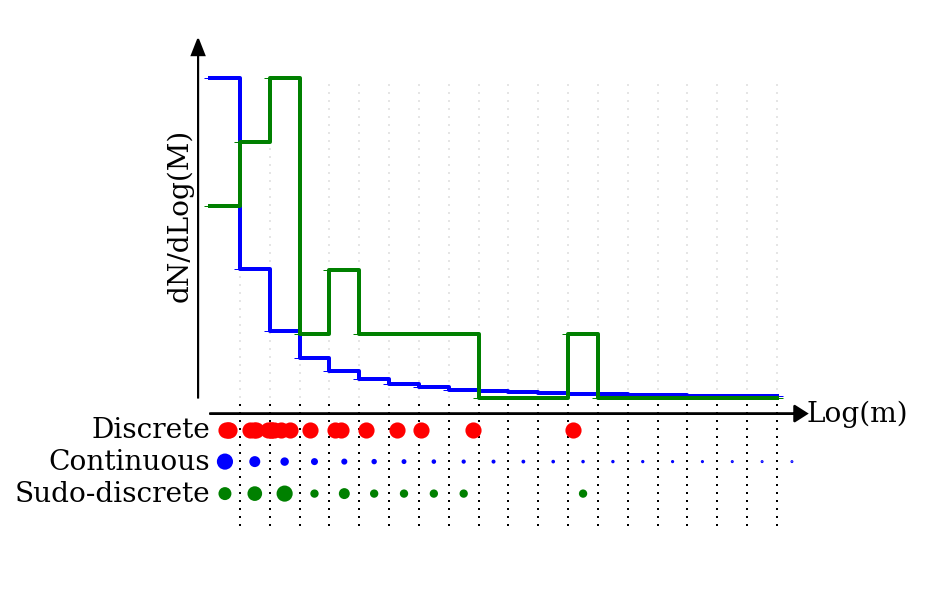

In [9]:
# plot parameters
mass_range = (1, 10)
N_bins = 10
N_masses = 20

# make a continuously sampled isochrone
np.random.seed(0)   # make sure to get always the same "random"
x = np.linspace(mass_range[0], mass_range[1], N_masses)
x.sort()
y = np.zeros(len(x))
yrange = (-0.4, 1)

# positions for the dots
discrete_y = -0.1
conti_y = -0.2
fastd_y = -0.3

hist_offset = 0.00

# find mass bins
binx = np.hstack([x[0] - 0.5 * (x[1] - x[0]),
                  0.5 * (x[1:] + x[:-1]),
                  x[-1] + 0.5 * (x[-1] - x[-2])])

# draw N stars from the mass range
oimf = imf.Salpeter()
m = oimf.rvs(N_masses, x.min(), x.max())

# plot frames
plt.arrow(binx[0], -0.05, binx[-1] - binx[0], 0, color='k',
          length_includes_head=True, head_width=0.05, head_length=0.2)
plt.text(binx[-1], -0.05, 'Log(m)', ha='left', va='center')

plt.arrow(binx[0] - 0.02 * (binx[-1] - binx[0]),
          0, 0,
          0.8 * (yrange[1] - yrange[0]),
          0,
          color='k', length_includes_head=True, head_width=0.2,
          head_length=0.05)
plt.text(binx[0] - 0.05 * (binx[-1] - binx[0]), 0.5 * (yrange[1] + yrange[0]),
         'dN/dLog(M)', ha='center', va='bottom', rotation=90)

plt.vlines(binx[1:-1], yrange[0], 0, colors='k', linestyle=':', zorder=-100)
plt.vlines(binx[1:-1], 0, yrange[1], colors='k', linestyle=':', alpha=0.1, zorder=-100)

# plot discrete masses
plt.scatter(m, np.zeros(len(m)) + discrete_y, color='r', s=50)
plt.text(binx[0], discrete_y, 'Discrete', ha='right', va='center')

# plot discrete masses
dn = oimf.getValue(x) * np.diff(binx)
dn /= dn.max()
# plt.plot(x, np.zeros(len(x)) + conti_y, 'bs')
plt.text(binx[0], conti_y, 'Continuous', ha='right', va='center')

plt.scatter(x, np.zeros(len(x)) + conti_y, s=50 * dn, color='b')
plt.step(binx[:-1], yrange[1] * dn + hist_offset, 'b_', where='post', lw=2)

# plot sudo-discrete masses
n, b = np.histogram(m, bins=binx)
n = n.astype(float) / n.max()

# plt.plot(x, np.zeros(len(x)) + fastd_y, 'g^')
plt.scatter(x, np.zeros(len(x)) + fastd_y, s=50 * n, color='g')
plt.step(b[:-1], yrange[1] * n + hist_offset, 'g_', where='post', lw=2)
plt.text(binx[0], fastd_y, 'Sudo-discrete', ha='right', va='center')

figrc.hide_axis('top bottom left right'.split())
plt.setp(plt.gca().xaxis.get_ticklabels() +
         plt.gca().yaxis.get_ticklabels(), visible=False)

xlim = plt.xlim()
plt.xlim(min(mass_range[0], xlim[0]), max(mass_range[0], xlim[1]))

figrc.setMargins(top=1, bottom=0, right=1)

LatexFigure(r"""sampling""",
r"""Comparison of the different sampling methods. In this figure,
an isochrone is considered as a uni-dimensional function of mass
adequately sampled. We drew 20 masses from a single power-law
represented in red at their exact values. We compare these draw to the
prediction from a continuum of stars, continuous assumption, represented
in blue, and we also compare to the approximative discrete scheme in
green. The size of the points are relatively proportional to the number
of stars. To help the comparison, we added the histograms of the number of
stars per log-mass bin with the same color code. The red and green
histograms superimpose perfectly by definition. This illustrates the
preservation of the stochastic regime through the approximative discrete
method.
""")

## Fast discrete with Pegase
Example that generates an SSP model assuming an approximative discrete sampling 

The most important difference in this mode lies into the definition of the number of stars that builds the population.
When the number of stars is small, stochastic presence of post-main sequence stars (most massive) has significant impact on the spectrum of the population. 

In constrast with the continuous assumption, in this mode we strictly draw `nstars` masses from the stellar mass function and associate them with the closest isochrone point (i.e., we bin the randomly drawn masses into the continuously sampled isochrone). This variation leads to a discrete integer number of stars (above `star_dN`) which can also be null.

```python
# generate a sample of stars using a continously sampled isochrone
# also retrieve the bins for further down usage
stars, logm_bins = oISO._get_continuous_isochrone(age, Z, ret_bins=True)
m_bins = 10 ** logm_bins

# compute the contribution of each isochrone point
# dN is a the number of stars per mass bin
# let's draw Nstar masses and put them into the isochrone bins
stars_masses = oIMF.random(Nstars)
stars_dN = np.histogram(stars_masses, bins=m_bins)[0]
```

The rest remains **identical** to the continuous code, apart from new properties that one can extract

```python
# generate a stellar spectrum for each "star" point
# from the isochrone sampling.
stars_spectra = oSL.generate_individual_spectra(stars)

# stars_spectra contains the spectra, their wavelength 
# but may also contain library indexes is one use
# a composite library (lib1 + lib2 + ...)
# I silently unpack the result below.
try: 
    # Composite library also returns which lib was used
    l0, s0, _ = stars_spectra
except ValueError:
    # Single library
    l0, s0 = stars_spectra

# Sum the spectra weighted by their (number) contribution
stellar_spectrum = np.nansum(s0 * stars_dN[:, None], 0)

# We now compute the nebular component by first computing the fraction 
# of photons ionizing HI per star.
NHI_per_star = oSL.generate_individual_values(stars, 'NHI')
# we sum the fractions weighted by their contribution
NHI_total = np.nansum(NHI_per_star * stars_dN)
# finally we add the nebular component to the stellar one
# given the fraction `fracNeb` of NHI that is re-processed
if (oNEB is not None) & (fracNeb > 0):
    l, s = oNEB.add_emission(l0, stellar_spectrum, NHI_total, fracNeb)
else:
    l, s = l0, stellar_spectrum

# let's propagate units from the stellar library
s = s * oSL.flux_units 

# one can extract some properties of the population
maxM = 10 ** (stars['logM'].max()) # upper mass of the isochrone Mmax(age, Z)
ind = (stars_masses > maxM)       
Mdead = np.sum(stars_masses[ind])  # total mass above the isochrone limit
Minit = np.sum(stars_masses)       # mass contributing to the light
Mmax = np.max(stars_masses)        # maximum single stellar mass 

properties = dict(
    # population
    Nstars=Nstars, # continuous convention
    Lbol=(10 ** stars['logL']).sum() * unit['lsun'],
    l0=l0,
    s0=stellar_spectrum * oSL.flux_units,
    Mmax=Mmax * unit['Msun'],
    Minit=Minit * unit['Msun'],
    Mtot=Minit * unit['Msun'],
    Mdead=Mdead * unit['Msun'],
    # ingredients
    stellib=oSL,
    iso=oISO,
    neb=oNEB,
    imf=oIMF,
    # parameters
    fracneb=fracNeb,
    age=age,
    Z=Z,
    # intermediate
    stars=stars,
    dN=stars_dN
)
```

**Optimizing for multiple populations at fixed parameters**

It is clear from the above snippet that the additional cost of fast-discrete modeling compared to continuous is coming from sampling the mass function and binning the draws. The `fast_discrete` function in `ssp.py` gives an example of drawing multiple populations of the same properties in an efficient way.

Below, we draw multiple populations using the same parameters to show this effect.
We pick the same ingredients as before:

In [10]:
oIMF = imf.Kroupa2001()
oISO = isochrones.Pegase()
oNEB = nebular.pegase()
oSL  = stellibs.Rauch()  + stellibs.BaSeL()
# oSL = stellibs.BaSeL()
# oSL = stellibs.Elodie()

In [11]:
Nstars = int(1e3)        # Number of stars
age = 1e9 * unit['yr']
Z = 0.02
fracNeb = 1.
nsamp = 10

We run the simulation. Note that we use `fast_discrete1` that is optimized to generate multiple random populations at fixed properties.

In [12]:
from pypegase import ssp

with timeit('Pseudo-discrete SSP generation'):
    l, s, p = ssp.fast_discrete(Nstars, age, Z, 
                                oIMF, oISO, oSL,  oNEB, 
                                fracNeb=fracNeb, dlogm=0.01, 
                                nsamp=nsamp)

Timing Pseudo-discrete SSP generation
|##########| 9/9 100% [time: 00:00, eta: 00:00, 26.49 iters/sec]              
Pseudo-discrete SSP generation Execution time: 1.92 s


Figure: Population_fast_discrete ( Simulation of stochastic population of $1\times10^{3}$ stars.  **top left**: HD diagram of the population. Each gray dot shows the location of a model in the spectral library. The line shows the isochrone color-coded by number of stars (red: many vs. blue: few)  **bottom left**: the distribution is integrated initial masses. **Right** Each black line represents the spectrum of one of the $10$ simulations.  The red line shows the mean value over the different populations.)

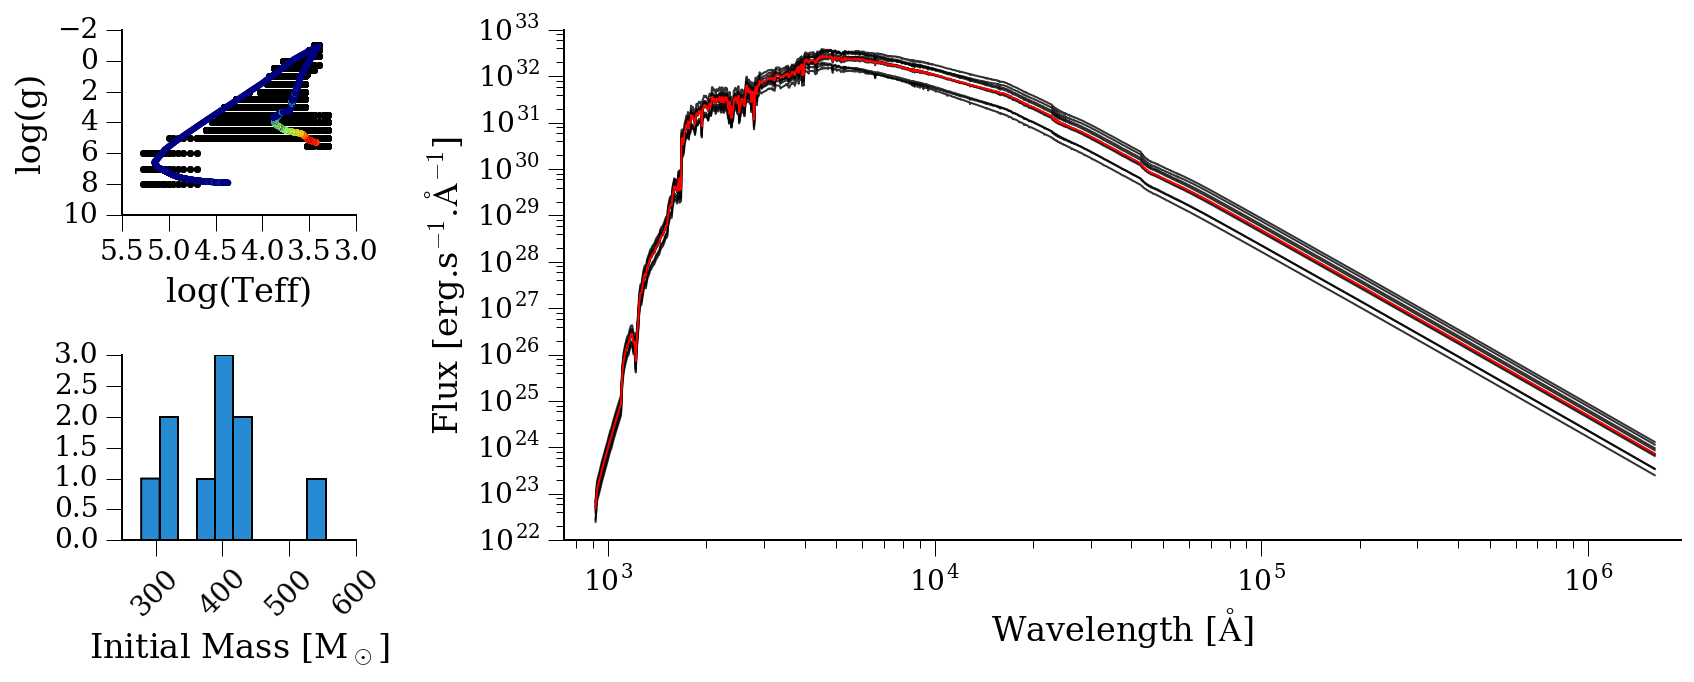

In [13]:
def unit_drop(q, u=None):
    """ Drop units or assume its ok """
    if hasUnit(q):
        if u is not None:
            return q.to(u).magnitude
        else:
            return q.magnitude
    else:
        return q
    
plt.figure(figsize=(12, 5))
    
# HRdiagram: plot stellib log(g), log(Teff), selected isochrone, ...etc.
# ----------------------------------------------------------------------
ax1 = plt.subplot2grid((2, 4), (0, 0), 1, 1)
# plot the grid
ax1.plot(oSL.logT, oSL.logg, '.', color='0.0', zorder=-100)
# plot the isochrone
weights = np.log10(p['dN'].sum(axis=0) + 0.1)
ax1.scatter(p['stars'].logT, p['stars'].logg, s=10, c=weights, edgecolor='None')
# polish axis orientations and labels
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('log(g)')
ax1.set_xlabel('log(Teff)')
figrc.hide_axis('top right'.split(), ax=ax1)

# Plot the final spectrum (w/ and w/o nebular component)
# -----------------------------------------------------
meanspec = unit_drop(s).mean(axis=0)
ax2 = plt.subplot2grid((2, 4), (0, 1), 2, 3)
alpha = min(max(1e-2, (10. - 2. * np.log10(nsamp)) / nsamp), 1)
ax2.loglog(unit_drop(l), unit_drop(s).T, color='k', alpha=alpha)
ax2.loglog(unit_drop(l), meanspec, color='r')
ax2.set_xlabel(r'Wavelength [$\rm{\AA}$]')
ind = meanspec > 0
_l = unit_drop(l)[ind]
ax2.set_xlim(_l.min() * 0.8, _l.max() * 1.2)
figrc.hide_axis('top right'.split(), ax=ax2)

if 'Lsun' in str(s.units):
    ax2.set_ylabel(r'Flux [L$_\odot$.$\rm{\AA}^{-1}$]')
else:
    ax2.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$]')

# Plot individual draws
# ----------------------
ax3 = plt.subplot2grid((2, 4), (1, 0), 1, 1)
ax3.hist(unit_drop(p['Minit']))
figrc.setNmajors(5, ax=ax3)
figrc.hide_axis('top right'.split(), ax=ax3)
ax3.set_xlabel('Initial Mass [M$_\odot$]')
plt.setp(ax3.get_xticklabels(), rotation=45)

plt.tight_layout()


LatexFigure('Population_fast_discrete', 
r""" Simulation of stochastic population of ${nstars:s}$ stars. 
**top left**: HD diagram of the population. Each gray dot shows the location of a model in the spectral library.
The line shows the isochrone color-coded by number of stars (red: many vs. blue: few) 
**bottom left**: the distribution is integrated initial masses.
**Right** Each black line represents the spectrum of one of the ${nsamp:d}$ simulations. 
The red line shows the mean value over the different populations.""".format(nstars=figrc.latex_float(Nstars), nsamp=nsamp))

# (Fully) Discrete Population

In one discrete SSP model, we apply directly the definition of an SSP. 
We consider $N$ stars formed
at the same time $t$ in the past, which follow a mass distribution distribution
driven by the choice an IMF, $\phi(m)$, and with identical chemical composition
$Z$. The integrated spectrum of such population is hence given by the summation
of the spectrum $f_\lambda$ of the individual stars:
\begin{eqnarray}
  S_\lambda^N (t, Z) &=& \sum_{i=1}^{N} f_\lambda\, \left( m_i, t, Z \right), \\
  \&\ \frac{dN}{dm} &=& \phi(m)\nonumber,
\end{eqnarray}
where the mass function, $\phi(m)$, represents the probability of a stellar mass
$m$ to contribute to the observed light of the population.

## Discrete with Pegase 

What's the difference from before? The expensive difference is that we now compute for each mass drawn from the IMF the associated stellar spectrum. This means interpolating isochrones at the exact mass of interests before proceeding similarly to other model prescription.
This is of course expensive if we build a population of many stars.

The code below generates a discrete population

```python
# let's draw Nstar masses from the IMF
stars_masses = oIMF.random(Nstars)

# We sample the isochrone at each of these masses
# generate a sample of stars using a continously sampled isochrone
# also retrieve the bins for further down usage
stars = oISO.get_isochrone(age, Z, masses=stars_masses)
```

The rest remains almost identical apart from the fact that `stars_dN` disappears, each star comes as a full entity.

```python
# generate a stellar spectrum for each "star" point
# from the isochrone sampling.
stars_spectra = oSL.generate_individual_spectra(stars)

# stars_spectra contains the spectra, their wavelength 
# but may also contain library indexes is one use
# a composite library (lib1 + lib2 + ...)
# I silently unpack the result below.
try: 
    # Composite library also returns which lib was used
    l0, s0, _ = stars_spectra
except ValueError:
    # Single library
    l0, s0 = stars_spectra

# Sum the spectra weighted by their (number) contribution
stellar_spectrum = np.nansum(s0, 0)

# We now compute the nebular component by first computing the fraction 
# of photons ionizing HI per star.
NHI_per_star = oSL.generate_individual_values(stars, 'NHI')
# we sum the fractions weighted by their contribution
NHI_total = np.nansum(NHI_per_star)
# finally we add the nebular component to the stellar one
# given the fraction `fracNeb` of NHI that is re-processed
if (oNEB is not None) & (fracNeb > 0):
    l, s = oNEB.add_emission(l0, stellar_spectrum, NHI_total, fracNeb)
else:
    l, s = l0, stellar_spectrum

# let's propagate units from the stellar library
s = s * oSL.flux_units 

# one can extract some properties of the population
maxM = 10 ** (stars['logM'].max()) # upper mass of the isochrone Mmax(age, Z)
ind = (stars_masses > maxM)       
Mdead = np.sum(stars_masses[ind])  # total mass above the isochrone limit
Minit = np.sum(stars_masses)       # mass contributing to the light
Mmax = np.max(stars_masses)        # maximum single stellar mass 

properties = dict(
    # population
    Nstars=Nstars, # continuous convention
    Lbol=(10 ** stars['logL']).sum() * unit['lsun'],
    l0=l0,
    s0=stellar_spectrum * oSL.flux_units,
    Mmax=Mmax * unit['Msun'],
    Minit=Minit * unit['Msun'],
    Mtot=Minit * unit['Msun'],
    Mdead=Mdead * unit['Msun'],
    # ingredients
    stellib=oSL,
    iso=oISO,
    neb=oNEB,
    imf=oIMF,
    # parameters
    fracneb=fracNeb,
    age=age,
    Z=Z,
    # intermediate
    stars=stars,
    dN=None
)
```

In [14]:
Nstars = int(1e5)        # Number of stars
age = 1 * unit['Myr']
Z = 0.02
fracNeb = 1.

In [15]:
# let's draw Nstar masses from the IMF
stars_masses = oIMF.random(Nstars)

# We sample the isochrone at each of these masses
# generate a sample of stars using a continously sampled isochrone
# also retrieve the bins for further down usage
stars = oISO.get_isochrone(age, Z, masses=stars_masses)

# generate a stellar spectrum for each "star" point
# from the isochrone sampling.
stars_spectra = oSL.generate_individual_spectra(stars)

# stars_spectra contains the spectra, their wavelength 
# but may also contain library indexes is one use
# a composite library (lib1 + lib2 + ...)
# I silently unpack the result below.
try: 
    # Composite library also returns which lib was used
    l0, s0, _ = stars_spectra
except ValueError:
    # Single library
    l0, s0 = stars_spectra

# Sum the spectra weighted by their (number) contribution
stellar_spectrum = np.nansum(s0, 0)

# We now compute the nebular component by first computing the fraction 
# of photons ionizing HI per star.
NHI_per_star = oSL.generate_individual_values(stars, 'NHI')
# we sum the fractions weighted by their contribution
NHI_total = np.nansum(NHI_per_star)
# finally we add the nebular component to the stellar one
# given the fraction `fracNeb` of NHI that is re-processed
if (oNEB is not None) & (fracNeb > 0):
    l, s = oNEB.add_emission(l0, stellar_spectrum, NHI_total, fracNeb)
else:
    l, s = l0, stellar_spectrum

# let's propagate units from the stellar library
s = s * oSL.flux_units 

# one can extract some properties of the population
maxM = 10 ** (stars['logM'].max()) # upper mass of the isochrone Mmax(age, Z)
ind = (stars_masses > maxM)       
Mdead = np.sum(stars_masses[ind])  # total mass above the isochrone limit
Minit = np.sum(stars_masses)       # mass contributing to the light
Mmax = np.max(stars_masses)        # maximum single stellar mass 

properties = dict(
    # population
    Nstars=Nstars, # continuous convention
    Lbol=(10 ** stars['logL']).sum() * unit['lsun'],
    l0=l0,
    s0=stellar_spectrum * oSL.flux_units,
    Mmax=Mmax * unit['Msun'],
    Minit=Minit * unit['Msun'],
    Mtot=Minit * unit['Msun'],
    Mdead=Mdead * unit['Msun'],
    # ingredients
    stellib=oSL,
    iso=oISO,
    neb=oNEB,
    imf=oIMF,
    # parameters
    fracneb=fracNeb,
    age=age,
    Z=Z,
    # intermediate
    stars=stars,
    dN=None
)

Figure: Population_discrete ( Final population characteristics.  **left**: HD diagram of the population.  Each gray dot shows the location of a model in the spectral library. The green line shows the isochrone of the population.  Colored dots emphasize the stars selected to construct the population red means  more weight than blue during the interpolation.  **Right** the final spectrum (green) is constructed by adding the contribution  of each star in the population (blue) with the nebular component.  **Population characteristics**     Age:  1 Myr,     Z: 0.0200,     Nstars: $1\times10^{5}$ ;     **Ingredients**     IMF: Kroupa 2001,     Isochrone: Pegase.2 (Fioc+1997),     Nebular: Pegase model (Fioc+1997),     Stellib: Rauch + BaSeL 2.2 )

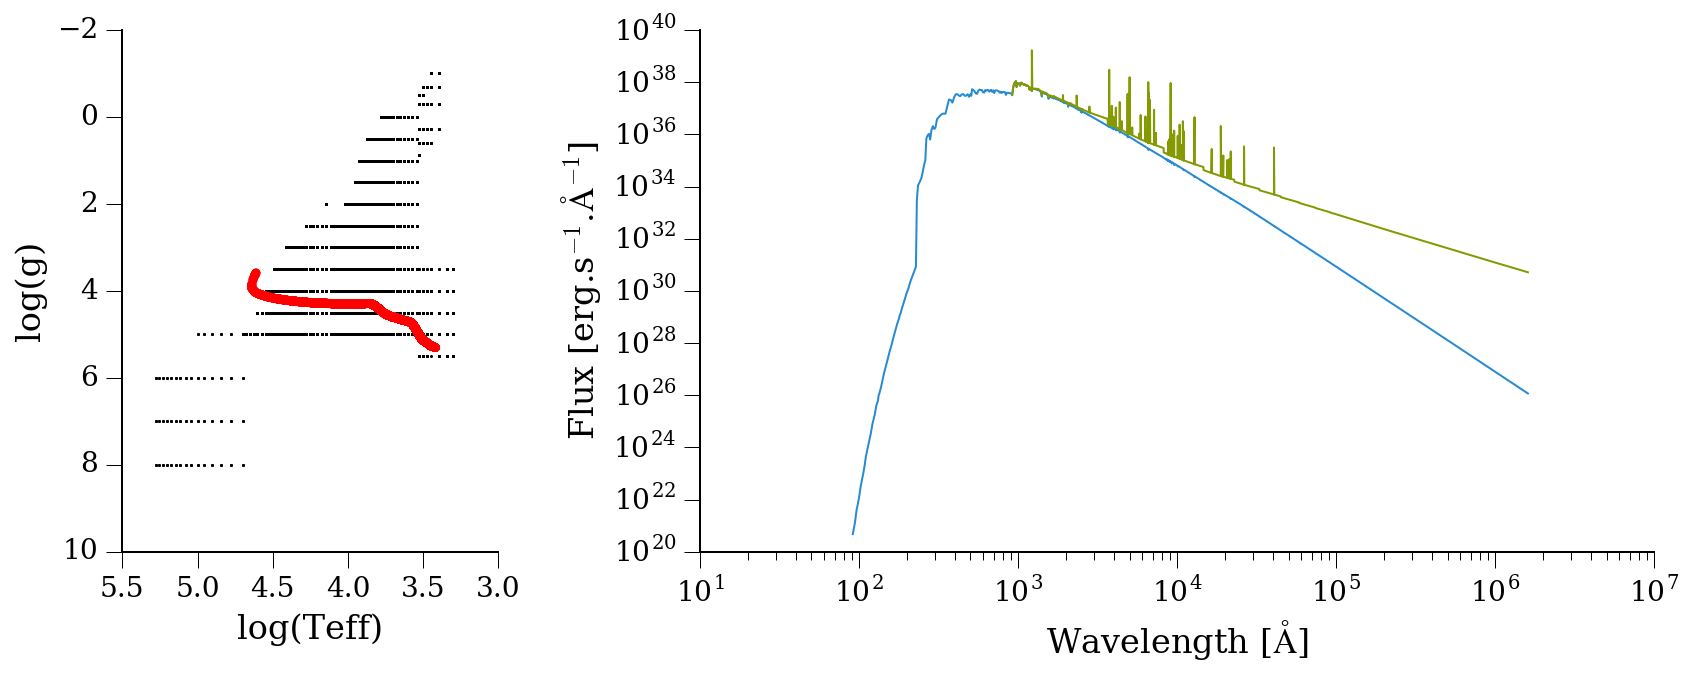

In [16]:
from matplotlib import ticker

# Handle default units for the plots
# We plot the wavelength in AA and the spectra in erg/s/AA/msun
p = properties
l = val_in_unit('wavelength', l, 'AA').magnitude
l0 = val_in_unit('l0', p['l0'], 'AA').magnitude
s = val_in_unit('spectrum', s, 'erg/s/AA').magnitude
s0 = val_in_unit('s0', p['s0'], 'erg/s/AA').magnitude
mtot = val_in_unit('Mtot', p['Mtot'], 'msun').magnitude
stars = p['stars']  # individual stars
dN = p['dN']        # individual weights

plt.figure(figsize=(12, 5))

# HRdiagram: plot stellib log(g), log(Teff), selected isochrone, ...etc.
# ----------------------------------------------------------------------
ax1 = plt.subplot2grid((1, 3), (0, 0), 1, 1)
# plot the grid
ax1.plot(oSL.logT, oSL.logg, '.', color='0.0', ms=2, rasterized=True, zorder=-10)
# plot the isochrone
# ax1.plot(stars['logT'], stars['logg'], '-', color='0.5', lw=2)
sc = ax1.scatter(stars['logT'], stars['logg'], c='r', edgecolor='None', zorder=100)

#axcb = plt.axes([0.1, 0.95, 0.15, 0.03])
#cb = plt.colorbar(sc, cax=axcb, orientation='horizontal')
#cb.set_label('log(w)')
#tick_locator = ticker.MaxNLocator(nbins=4)
#cb.locator = tick_locator
#cb.update_ticks()

# polish axis orientations and labels
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('log(g)')
ax1.set_xlabel('log(Teff)')
figrc.hide_axis('top right'.split(), ax=ax1)

# Plot the final spectrum (w/ and w/o nebular component)
# -----------------------------------------------------
ax2 = plt.subplot2grid((1, 3), (0, 1), 1, 2)
ax2.loglog(l0, s0)
ax2.loglog(l, s)
ax2.set_xlabel(r'Wavelength [$\rm{\AA}$]')
ax2.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$]')
figrc.hide_axis('top right'.split())

plt.tight_layout()

LatexFigure('Population_discrete', 
r""" Final population characteristics. 
**left**: HD diagram of the population. 
Each gray dot shows the location of a model in the spectral library.
The green line shows the isochrone of the population. 
Colored dots emphasize the stars selected to construct the population red means 
more weight than blue during the interpolation. 
**Right** the final spectrum (green) is constructed by adding the contribution 
of each star in the population (blue) with the nebular component.

**Population characteristics**
    Age: {age} Myr,
    Z: {Z:0.4f},
    Nstars: ${Nstars:s}$
;    
**Ingredients**
    IMF: {imf:s},
    Isochrone: {iso:s},
    Nebular: {neb:s},
    Stellib: {stellib:s}
""".format(age=latexFloat(val_in_unit('age', p['age'], 'Myr').magnitude)[1:-1],
           Z=p['Z'], Nstars=figrc.latex_float(p['Nstars']),
           imf=oIMF.name, iso=oISO.name, neb=oNEB.name, stellib=oSL.name))

There is no obvious optimization possible for constructing fully discrete populations. Each set of masses triggers a new set of isochrone points to compute etc.

# Comparing interpolation methods

In this version of the code, we offer multiple interpolation schemes with the spectral and atmosphere libraries.

Below we look into the differences that can appear due to interpolation details.

In [17]:
from pypegase import stellibs, isochrones, imf

In [18]:
# population parameters
age = 1e9 * unit['yr']
Z = 0.02

# get isochrone
oISO = isochrones.Pegase()
stars = oISO._get_continuous_isochrone(age, Z)

# Mass function
oIMF = imf.Kroupa2001()
# IMF weights in the continuous assumption
dN = oIMF.nstars1(stars['logM'])

# library with different interpolations
lejeune = stellibs.Rauch(interpolator='lejeune') + stellibs.BaSeL(interpolator='lejeune')
ndlinear = stellibs.Rauch(interpolator='ndlinear') + stellibs.BaSeL(interpolator='ndlinear')

# compute the individual "star" spectra
l1, s1, _ = lejeune.generate_individual_spectra(stars)
l2, s2, _ = ndlinear.generate_individual_spectra(stars)

# combine them
sfinal1 = np.nansum(s1 * dN[:, None], 0)
sfinal2 = np.nansum(s2 * dN[:, None], 0)

Figure: interp_stellib (Simulation of the same population assuming continuous prescription with 2 differente interpolations. The Lejeune scheme is the  common Pegase interpolation, while the NDLinear is more restrictive and does not allow any extrapolation. )

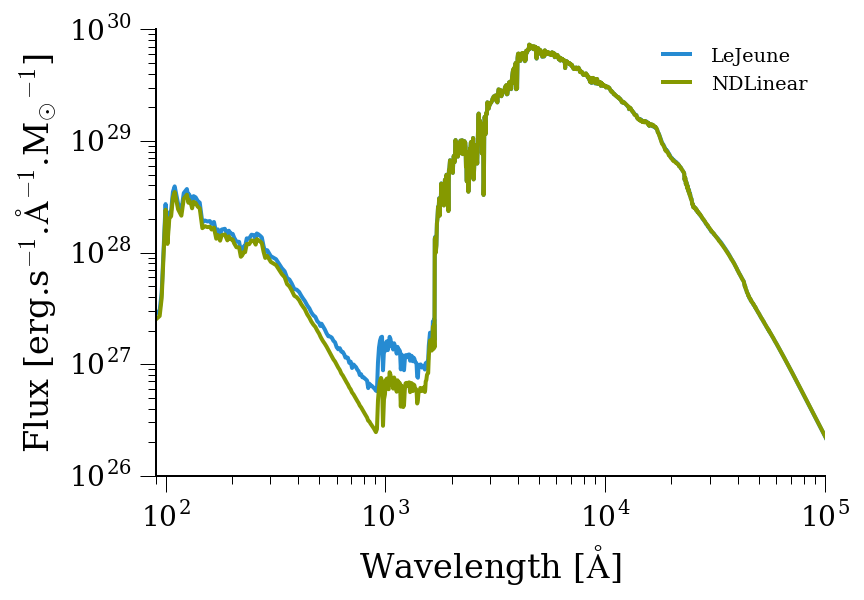

In [19]:
# pyStellibs - Lejeune interpolation
plt.loglog(l1.magnitude, np.nansum(s1 * dN[:, None], 0), label='LeJeune', lw=2)

# pyStellibs - NDlinear interpolation
plt.loglog(l2.magnitude, np.nansum(s2 * dN[:, None], 0), label='NDLinear', lw=2)
plt.legend(frameon=False, loc='best', fontsize='x-small')
plt.ylim(1e26, 1e30)
plt.xlim(90, 1e5)

ax = plt.gca()
ax.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
ax.set_xlabel(r'Wavelength [$\rm{\AA}$]')
figrc.hide_axis('top right'.split(), ax=ax)

LatexFigure('interp_stellib',
r"""Simulation of the same population assuming continuous prescription with 2 differente interpolations. The Lejeune scheme is the 
common Pegase interpolation, while the NDLinear is more restrictive and does not allow any extrapolation.
""")

In [20]:
# the difference is that we bin mass samples instead of using the numbers above
masses = oIMF.rvs(1e8)
stars, logm_bins = oISO._get_continuous_isochrone(age, Z, ret_bins=True)
dN1, _ = np.histogram(np.log10(masses), bins=logm_bins)

Figure: method_stellib (Simulation of the same population assuming continuous and fast-discrete prescription (Lejeune interpolation). The discrete population contains $1\times10^{5}$ and was normalized to its total mass. )

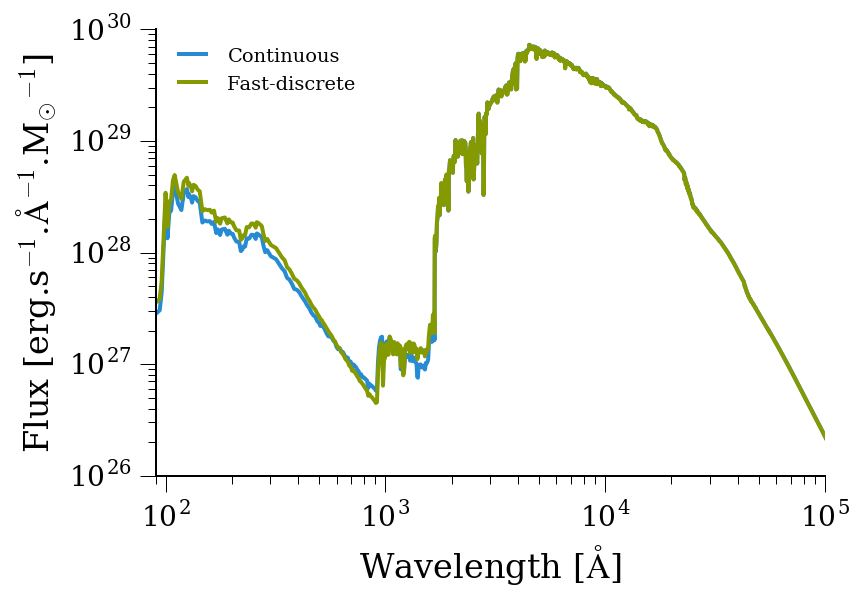

In [21]:
# Continous model
plt.loglog(l1.magnitude, np.nansum(s1 * dN[:, None], 0), label='Continuous', lw=2)

# Fast discrete model
plt.loglog(l1.magnitude, np.nansum(s1 * dN1[:, None], 0) / np.sum(masses), label='Fast-discrete', lw=2)

# figure polish
plt.legend(frameon=False, loc='best', fontsize='x-small')
plt.ylim(1e26, 1e30)
plt.xlim(90, 1e5)

ax = plt.gca()
ax.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
ax.set_xlabel(r'Wavelength [$\rm{\AA}$]')
figrc.hide_axis('top right'.split(), ax=ax)

LatexFigure('method_stellib',
r"""Simulation of the same population assuming continuous and fast-discrete prescription (Lejeune interpolation).
The discrete population contains ${nstars:s}$ and was normalized to its total mass.
""".format(nstars=figrc.latex_float(Nstars)))

# Effect of libraries

Figure: ingredients_stellib ( Simulation of the same star from it's astrophysical parameters with two libraries. This illustrates possible differences between spectral/atmosphere libraries.)

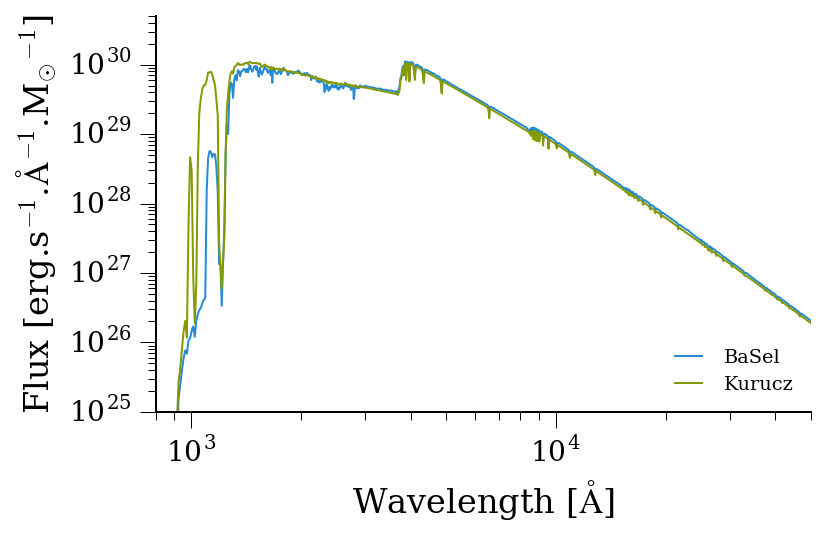

In [22]:
# load 2 libraries
basel = stellibs.BaSeL()
kurucz = stellibs.Kurucz()
ap = (4., 3.5, 0., 0.02)  # logT, logg, logL, Z
sb = basel.generate_stellar_spectrum(*ap)
sk = kurucz.generate_stellar_spectrum(*ap)

plt.loglog(basel._wavelength, sb, label='BaSel')
plt.loglog(kurucz._wavelength, sk, label='Kurucz')
plt.legend(frameon=False, loc='lower right', fontsize='x-small')
plt.ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
plt.xlabel(r'Wavelength [$\rm{\AA}$]')
plt.xlim(800, 5e4)
plt.ylim(1e25, 5e30)
plt.tight_layout()
figrc.hide_axis('top right'.split())

LatexFigure('ingredients_stellib',
r""" Simulation of the same star from it's astrophysical parameters with two libraries. This illustrates possible differences
between spectral/atmosphere libraries.""")

Figure: conti_stellib (Simulation of the same population assuming continuous prescription (Lejeune interpolation) but with different libraries. )

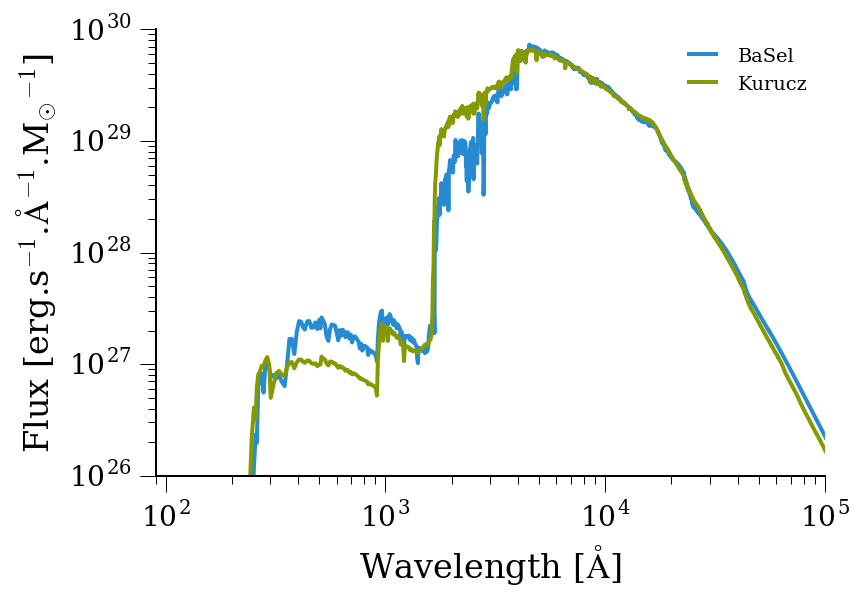

In [23]:
o1 = stellibs.BaSeL()
o2 = stellibs.Kurucz()

# compute the individual "star" spectra
l1, s1 = o1.generate_individual_spectra(stars)
l2, s2 = o2.generate_individual_spectra(stars)

# combine them with continous assumption
sfinal1 = np.nansum(s1 * dN[:, None], 0)
sfinal2 = np.nansum(s2 * dN[:, None], 0)

plt.loglog(l1.magnitude, sfinal1, label='BaSel', lw=2)
plt.loglog(l2.magnitude, sfinal2, label='Kurucz', lw=2)

plt.legend(frameon=False, loc='best', fontsize='x-small')
plt.ylim(1e26, 1e30)
plt.xlim(90, 1e5)

ax = plt.gca()
ax.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
ax.set_xlabel(r'Wavelength [$\rm{\AA}$]')
figrc.hide_axis('top right'.split(), ax=ax)

LatexFigure('conti_stellib',
r"""Simulation of the same population assuming continuous prescription (Lejeune interpolation) but with different libraries.
""")

# Discrete and Fast Discrete: binning effects

In this section, we look into the effect of the approximation made by fast discrete, i.e., binning masses onto the continuously sampled isochrone.

In this approximation, the worse case scenario is that a fiducial star replaces a true star lying at the edge of the isochrone bin. By default Pegase sets the bin width (continuous assumption) with respect to how much the selected isochrone varies in temperature, luminosity and mass. 
(default is `dlogm = dlogt = dlogl = 0.01 dex`). The default values of the approximation were chosen as a balance between computation efficiency and accuracy. Note that the approximation effect is smoothed over many stars.

[Figure bineffect](#bineffect) and [Figure bineffect2d](#bineffect2d) show twice the fractional error from the fast discrete approximation as function of mass, wavelength and both, respectively. The values on these figure correspond to the largest variations from side to the other of each mass bin w.r.t the central value. Therefore the actual approximation error is only at most half of that value.

In [32]:
oISO = isochrones.Pegase()
oSL  = stellibs.BaSeL()
# oSL  = stellibs.Kurucz()

age   = 1e6 * unit['yr']
# age   = 1e7 * unit['yr']
Z     = 0.02
dlogm = 1e-3

#get binning of the isochrone
center_stars, logm_bins = oISO.get_continuous_isochrone(age, Z, ret_bins=True, dlogm=dlogm)
center_masses = 10 ** center_stars['logM']
edge_masses = 10 ** logm_bins
edge_stars = oISO.get_isochrone(age, Z, masses=edge_masses)
l0, edge_spectra = oSL.generate_individual_spectra(edge_stars)
_, center_spectra = oSL.generate_individual_spectra(center_stars)
edge_diff = np.diff(edge_spectra.magnitude, axis=0)

Figure: bineffect (Maximum Relative r.m.s from approximating stellar spectra with the closest mass from continuously sampled isochrone. The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the  bin center spectra. The left and right panels show the fractional error as a function of stellar mass and wavelength, respectively. Based on an isochrone of age=$ 1$ Myr and metallicity $Z=0.020$, BaSeL 2.2 spectral library and the isochrone from Pegase.2 (Fioc+1997) with dlogm=$$0.001$$ )

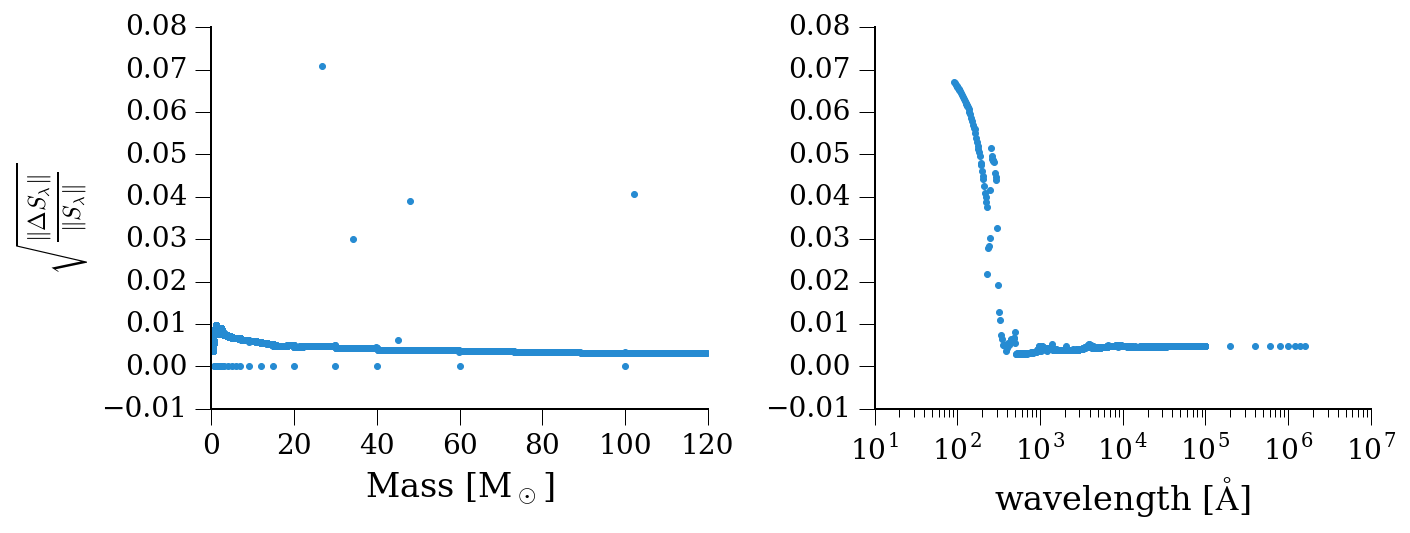

In [33]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(121)
frac_err= np.sqrt(np.sum(edge_diff ** 2, 1) / np.sum(center_spectra.magnitude ** 2, 1))
plt.plot(center_masses, frac_err.T, '.');
plt.ylim(-1e-2, plt.ylim()[1])
plt.xlabel(r'Mass [M$_\odot$]')
plt.ylabel(r'$\sqrt{\frac{\|\Delta S_\lambda\|}{\|S_\lambda\|}}$')
figrc.hide_axis('top right'.split())

plt.subplot(122, sharey=ax)
frac_err = np.sqrt(np.sum(edge_diff ** 2, 0) / np.sum(center_spectra.magnitude ** 2, 0))
plt.semilogx(l0.magnitude, frac_err.T, '.');
plt.ylim(-1e-2, plt.ylim()[1])
plt.xlabel(r'wavelength [$\rm \AA$]')
figrc.hide_axis('top right'.split())
plt.tight_layout()

LatexFigure('bineffect',
r"""Maximum Relative r.m.s from approximating stellar spectra with the closest mass from continuously sampled isochrone.
The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the 
bin center spectra. The left and right panels show the fractional error as a function of stellar mass and wavelength, respectively.
Based on an isochrone of age=${age:s}$ Myr and metallicity $Z={Z:0.3f}$, {stellib:s} spectral library and the isochrone from {iso:s} with dlogm=${dlogm:s}$
""".format(age=latexFloat(val_in_unit('age', age, 'Myr').magnitude)[1:-1],
           Z=Z, imf=oIMF.name, iso=oISO.name, stellib=oSL.name, dlogm=latexFloat(dlogm)))

Figure: bineffect2d (Maximum Relative r.m.s from approximating stellar spectra with the closest mass from continuously sampled isochrone. The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the  bin center spectra. This figure shows the fractional error as a function of stellar mass and wavelength. Based on an isochrone of age=$ 1$ Myr and metallicity $Z=0.020$, BaSeL 2.2 spectral library and the isochrone from Pegase.2 (Fioc+1997) with dlogm=$$0.001$$. )

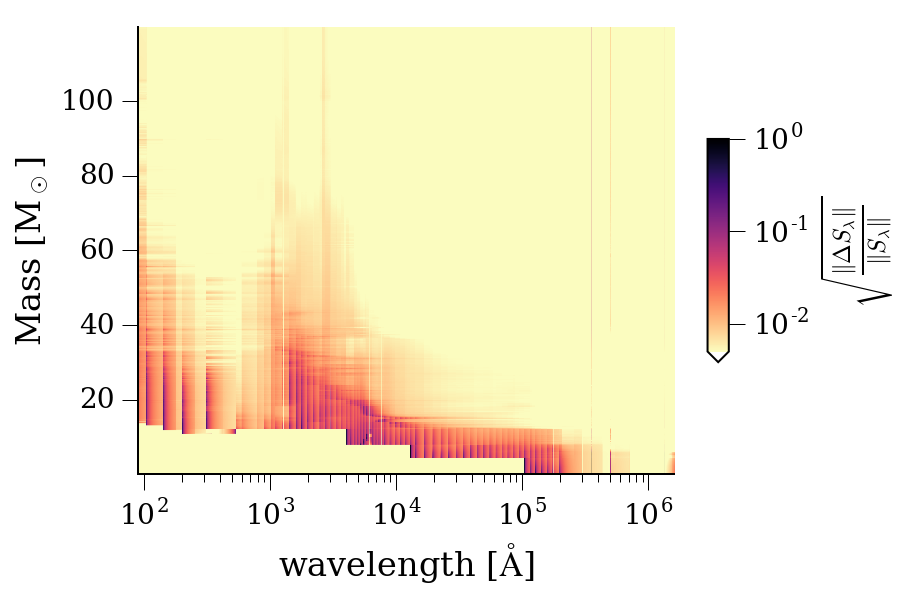

In [34]:
from matplotlib.colors import LogNorm
frac_err = np.sqrt(edge_diff ** 2 / center_spectra.magnitude ** 2)
frac_err[~np.isfinite(frac_err)] = 0.
frac_err += 1e-5
plt.imshow(frac_err.T, origin='lower', aspect='auto',
           extent=[l0.min().magnitude, l0.max().magnitude, center_masses.min(), center_masses.max()],
           cmap=plt.cm.magma_r, norm=LogNorm(), vmin=5e-3, vmax=1)
cb = plt.colorbar(extend='min', shrink=0.5, aspect=10)
cb.set_label(r'$\sqrt{\frac{\|\Delta S_\lambda\|}{\|S_\lambda\|}}$')
plt.xlabel(r'wavelength [$\rm \AA$]')
plt.ylabel(r'Mass [M$_\odot$]')
plt.xscale('log')
figrc.hide_axis('top right'.split())
LatexFigure('bineffect2d',
r"""Maximum Relative r.m.s from approximating stellar spectra with the closest mass from continuously sampled isochrone.
The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the 
bin center spectra. This figure shows the fractional error as a function of stellar mass and wavelength.
Based on an isochrone of age=${age:s}$ Myr and metallicity $Z={Z:0.3f}$, {stellib:s} spectral library and the isochrone from {iso:s} with dlogm=${dlogm:s}$.
""".format(age=latexFloat(val_in_unit('age', age, 'Myr').magnitude)[1:-1],
           Z=Z, iso=oISO.name, stellib=oSL.name, dlogm=latexFloat(dlogm)))

Figure: bineffect_population (Maximum Relative r.m.s due to isochrone binning on the integrated spectrum of a population assuming continuously sampled IMF. The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the  This figure shows the fractional error as a function of wavelength. Based on an isochrone of age=$ 1$ Myr and metallicity $Z=0.020$, BaSeL 2.2 spectral library and the isochrone from Pegase.2 (Fioc+1997) with dlogm=$$0.001$$, and continuously sampled Kroupa 2001 IMF. )

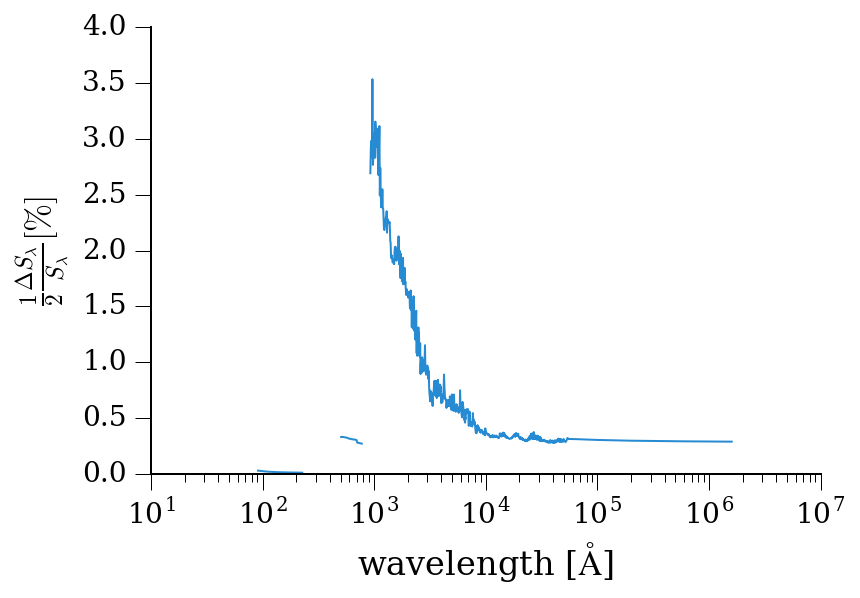

In [35]:
# Mass function
oIMF = imf.Kroupa2001()
# IMF weights in the continuous assumption
dN = oIMF.nstars1(center_stars['logM'])
plt.semilogx(l0.magnitude, np.nansum(0.5 * np.abs(edge_diff) / center_spectra.magnitude  * dN[:, None], 0) * 100.)
plt.ylabel(r'$\frac{1}{2} \frac{\Delta S_\lambda}{S_\lambda} [\%]$')
plt.xlabel(r'wavelength [$\rm \AA$]')
figrc.hide_axis('top right'.split())
LatexFigure('bineffect_population',
r"""Maximum Relative r.m.s due to isochrone binning on the integrated spectrum of a population assuming continuously sampled IMF.
The relative r.m.s corresponds to the egde to edge spectral variation within each mass bin of the isochrone relative to the 
This figure shows the fractional error as a function of wavelength.
Based on an isochrone of age=${age:s}$ Myr and metallicity $Z={Z:0.3f}$, {stellib:s} spectral library and the isochrone from {iso:s} with dlogm=${dlogm:s}$, and continuously sampled {imf:s} IMF.
""".format(age=latexFloat(val_in_unit('age', age, 'Myr').magnitude)[1:-1],
           Z=Z, imf=oIMF.name, iso=oISO.name, stellib=oSL.name, dlogm=latexFloat(dlogm)))

# Producing collections

As we already did above, studying stochastic populations often require many realizations/draws to fully capture the stochastic behavior of the integrated spectrum. In the above, we used `ssp.fast_discrete` to generate a few spectra. Below I only consider an interests in the spectra and not the properties of the populations. Therefore, I code manually the procedure and only keep the spectra in memory.

In [30]:
from pypegase.tools.pbar import Pbar
nsamp = 500
npop = int(1e3)
age = 1e3 * unit['Myr']
Z = 0.02

# common part of the model: stars from the isochron
stars, logm_bins = oISO._get_continuous_isochrone(age, Z, ret_bins=True)

# library with different interpolations
osl = stellibs.Rauch(interpolator='lejeune') + stellibs.BaSeL(interpolator='lejeune')

# spectra 
l1, s1, _ = osl.generate_individual_spectra(stars)

# continuous model
dN = oIMF.nstars1(stars['logM'])
scont = np.nansum(s1 * dN[:, None], 0)

spectra = []
for _ in Pbar().iterover(range(nsamp)):
    masses = oIMF.rvs(npop)
    dNs = np.histogram(np.log10(masses), bins=logm_bins)[0]
    sfinal = np.nansum(s1 * dNs[:, None], 0)
    spectra.append(sfinal / sum(masses))

|##########| 500/500 100% [time: 00:08, eta: 00:00, 55.83 iters/sec]          


Figure: Population_example ( Example of discrete population synthesis compared with continuous assumption. Every black line represent one population randomly constructed.  The thick red lines indicates the median spectrum over all the draws and the think  ones the 1, 16, 84 and 99 percentiles, respectively. The blue line indicates what  the continuous assumption would produce.  **Population characteristics**     Age: $1 \times 10^{3}$ Myr,     Z: 0.0200,     Nstars: $1 \times 10^{3}$, ;     **Ingredients**     IMF: Kroupa 2001,     Isochrone: Pegase.2 (Fioc+1997),     Nebular: None,     Stellib: Rauch + BaSeL 2.2 )

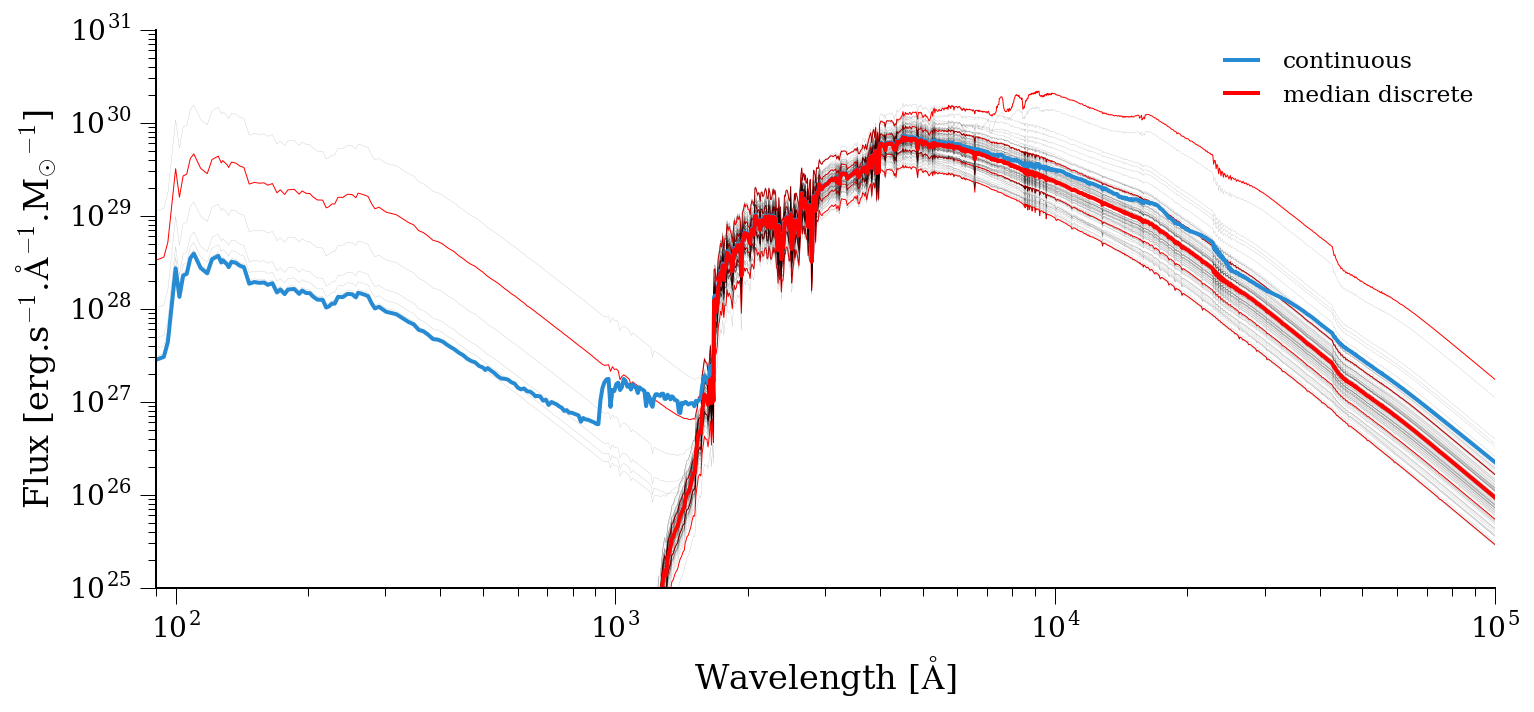

In [31]:
plt.figure(figsize=(12, 5))
plt.loglog(l1.magnitude, np.percentile(spectra, [1, 16, 84, 99], axis=0).T, color='r', lw=0.5);
plt.loglog(l1.magnitude, np.array(spectra[:100]).T, 'k-', lw=0.1, alpha=0.4, rasterized=True);
plt.loglog(l1.magnitude, scont, '-', lw=2, label='continuous');
plt.loglog(l1.magnitude, np.median(spectra, axis=0), color='r', lw=2, label='median discrete');
plt.ylim(1e25, 1e31)
plt.xlim(90, 1e5)
plt.legend(frameon=False, loc='best', fontsize='small')
ax = plt.gca()
ax.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
ax.set_xlabel(r'Wavelength [$\rm{\AA}$]')
figrc.hide_axis('top right'.split(), ax=ax)

LatexFigure('Population_example', 
r""" Example of discrete population synthesis compared with continuous assumption.
Every black line represent one population randomly constructed. 
The thick red lines indicates the median spectrum over all the draws and the think 
ones the 1, 16, 84 and 99 percentiles, respectively. The blue line indicates what 
the continuous assumption would produce.

**Population characteristics**
    Age: {age} Myr,
    Z: {Z:0.4f},
    Nstars: {Nstars:s},
;    
**Ingredients**
    IMF: {imf:s},
    Isochrone: {iso:s},
    Nebular: {neb:s},
    Stellib: {stellib:s}
""".format(age=latexFloat(val_in_unit('age', age, 'Myr').magnitude)[1:-1],
           Z=Z, Nstars=latexFloat(npop, '0.3')[1:-1],
           imf=oIMF.name, iso=oISO.name, neb=str(None), stellib=osl.name))

# Isochrone libraries

pyPegase comes with a suite of isochrones. The `Pegase` ischrones are legacy from previous versions of Pegase. These are based upon stellar evolution tracks of the Padova group (Bressan et al. 1993), with a simple extension through the thermally pulsating asymptotic giant branch based on the prescriptions of Groenewegen & de Jong (1993). The input stellar spectra are taken from the library of Lejeune et al. (1997).

However, one may want to use other (more recent) isochrones, therefore we also provide access to the online interfaces of `Parsec`, `MESA` and `Dartmouth` isochrones. Note that the later should not be used under $1$ Gyr of age.

Note that the interface to pyPegase remains identical for any of these sources, but caution must be raised as the adopted metallicity of the Sun ($Z_\odot$) is not the same across libraries.

In [3]:
from pypegase.isochrones import Pegase, Parsec, MIST, Dartmouth
from pypegase.units import unit

In [23]:
age = 1 * unit.Gyr
metal = 0.02   # regardless

dart_iso = Dartmouth().get_continuous_isochrone(age, metal)
mist_iso = MIST().get_continuous_isochrone(age, metal)
pars_iso = Parsec().get_continuous_isochrone(age, metal)
pega_iso = Pegase().get_continuous_isochrone(age, metal)  # internal

Interrogating http://stellar.dartmouth.edu/models/isolf_new.php...
Request...done.
Reading content...done.
Interrogating http://waps.cfa.harvard.edu/MIST/iso_form.php...
Request...done.
Reading content...done.
decompressing archive (type=zip)...done.
Interrogating http://stev.oapd.inaf.it...


Figure: Isochrone_examples (Example of isochrone sources for a population of $1.0$ Gyr and $Z=0.02$.)

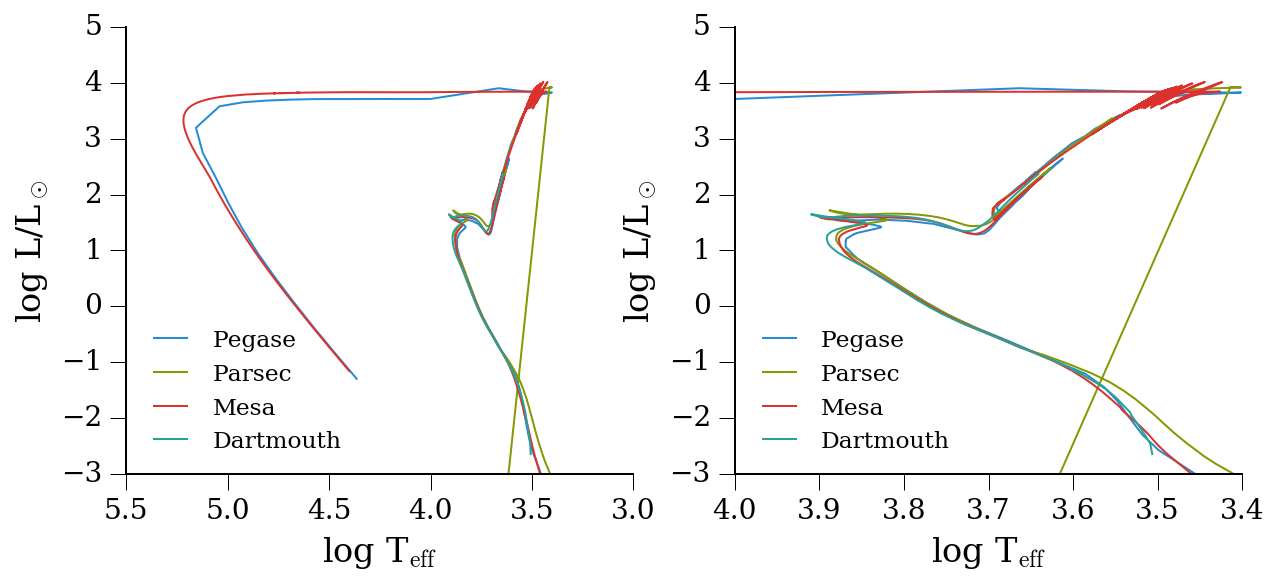

In [22]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
for iso, name in zip([pega_iso, pars_iso, mist_iso, dart_iso], 'Pegase Parsec Mesa Dartmouth'.split()): 
    plt.plot(iso.logT, iso.logL, '-', label=name)
plt.xlabel(r'log T$_{\rm{eff}}$')
plt.ylabel(r'log L/L$_\odot$')
plt.xlim(plt.xlim()[::-1])
plt.xlim(5.5, 3.0)
plt.ylim(-3, 5)
figrc.hide_axis('top right'.split())
plt.legend(frameon=False, loc='best', fontsize='small')

plt.subplot(122)
for iso, name in zip([pega_iso, pars_iso, mist_iso, dart_iso], 'Pegase Parsec Mesa Dartmouth'.split()): 
    plt.plot(iso.logT, iso.logL, '-', label=name)
plt.xlabel(r'log T$_{\rm{eff}}$')
plt.ylabel(r'log L/L$_\odot$')
plt.xlim(plt.xlim()[::-1])
plt.xlim(4.0, 3.4)
plt.ylim(-3, 5)
figrc.hide_axis('top right'.split())
plt.legend(frameon=False, loc='best', fontsize='small')
LatexFigure("Isochrone_examples",
            r"Example of isochrone sources for a population of ${0:0.1f}$ Gyr and $Z=0.02$.".format(age.to('Gyr').magnitude))

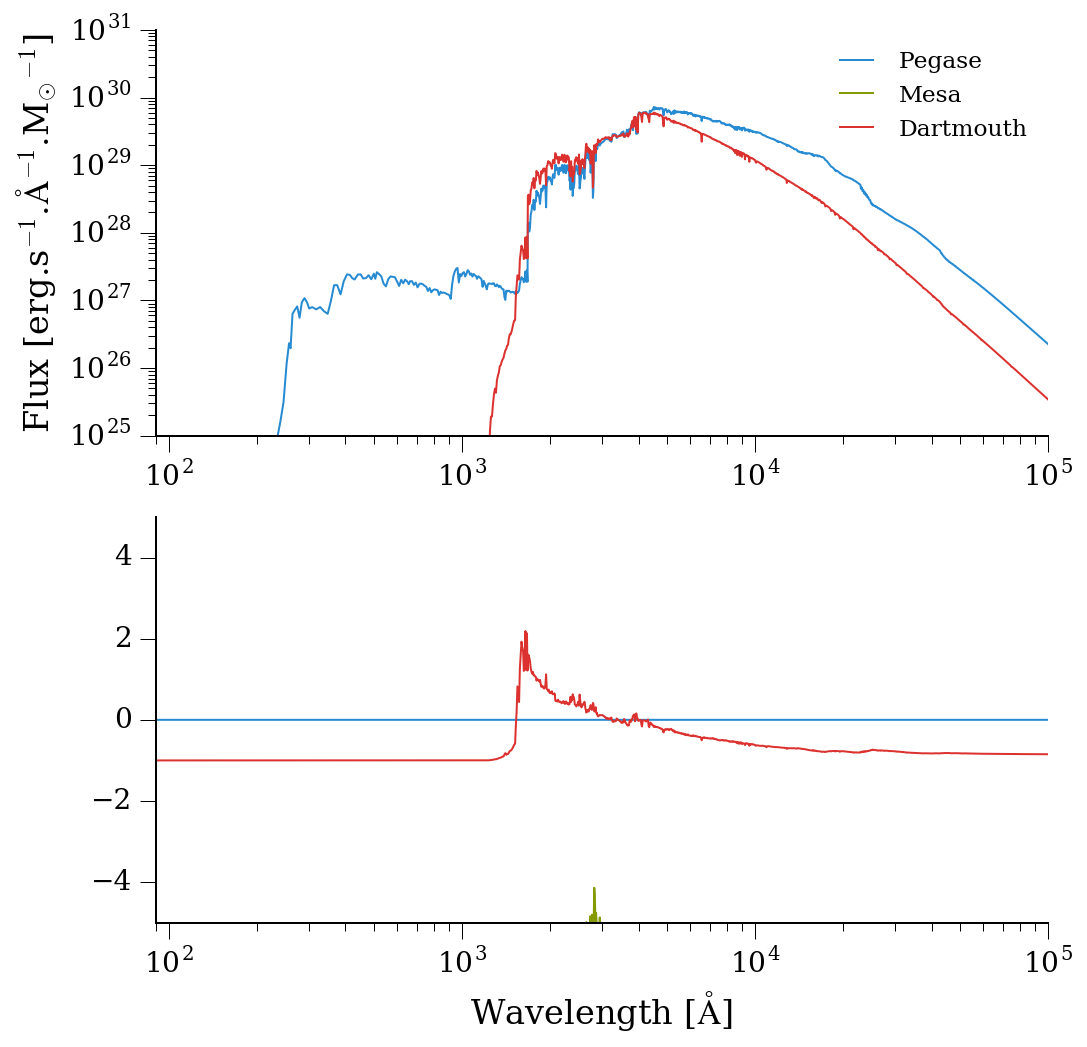

In [41]:
from pypegase import stellibs
from pypegase import imf

osl = stellibs.BaSeL()
oimf = imf.Kroupa2001()

l0, s0 = osl.generate_individual_spectra(pega_iso)
dN = oimf.nstars1(pega_iso['logM'])
s0 = np.nansum(s0 * dN[:, None], 0)

plt.figure(figsize=(8, 8))
ax0 = plt.subplot(211)
ax1 = plt.subplot(212, sharex=ax0)

for iso, name in zip([pega_iso, mist_iso, dart_iso], 'Pegase Mesa Dartmouth'.split()): 
    # spectra 
    dN = oimf.nstars1(iso['logM'])
    l1, s1 = osl.generate_individual_spectra(iso)
    scont = np.nansum(s1 * dN[:, None], 0)
    ax0.loglog(l1.magnitude, scont, '-', label=name)
    ax1.plot(l1.magnitude, (scont - s0) / s0, '-', label=name)

ax0.set_ylim(1e25, 1e31)
ax1.set_ylim(-5, 5)
plt.xlim(90, 1e5)
ax0.legend(frameon=False, loc='best', fontsize='small')
ax = plt.gca()
ax0.set_ylabel(r'Flux [erg.s$^{-1}$.$\rm{\AA}^{-1}$.M$_{\odot}$$^{-1}$]')
ax1.set_xlabel(r'Wavelength [$\rm{\AA}$]')
figrc.hide_axis('top right'.split(), ax=ax0)
figrc.hide_axis('top right'.split(), ax=ax1)